<center><h1>Lending Club case study Exploratory Data Analysis(EDA)</h1></center>

<center><B><I>Group members-:</I></B>
   <br>1.  <B>Amit sukla</B>
   <br>2.  <B>Deba shankar pati<B></center>

<h1><center> Bussiness Understanding</center></h1>

-  The Lending club company is a financial lending company which forms a bridge between borrower and lenders by it's online platform and gives loan at a lower interest rate.
-  Like Any other finance lending company it does not want to have credit loss due to defaults.
<h4> What is default ?</h4>
-  If a borrower does not pay it's due or term against the loan , or runs away with the sum he has taken then he/she considered as defaulter , in such case financial lender suffers loss.
<h4>What is the action we can take about the applicants who are likely to default ?</h4>
-  We can take some measures against such applicants :
1  such as denying for loan 2  giving loan in a higher interest 3  OR decrease the amount of loan for risky customers   
<h3> The problem statement.</h3>

-  the problem statement here is to find out the important variables or attributes of customers and the loan which are inducing the default , which in turn is causing credit loss to the lending company (.i.e. Lending Club) , which in future will direct the decission of the investor whether to invest the loan amount on a particular borrower or not , and there by cutting the financial loss of  LC.


<h1><center>What we will do to get the significant variables which induces default through EDA ?</center></h1>
<h4> Clean the data set (here it is given as loan.csv) </h4>
<h4> Describe the variables in bussiness terms and further remove the attributes which are not important to risk analysis </h4>
<h4> Remove outliers if any</h4>
<h4> Do univariate analysis to see further distribution of data accross population</h4>
<h4> Do bivariate analysis to describe the relationship between the <I><U> target variable</U> </I> and <I><U>important 
    attributes</U></I></h4>
<h4> Do multivariate analysis to describe the relationship between the <I><U> target variable</U> </I> and <I><U>important 
    attributes</U></I></h4>    
<h4> Give the summery and recomendation </h4>

<h1><center>Clean the dataset</center></h1>

In [144]:
#first let's import the library and read the csv file to create our data frame
#import all the libraries
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#read csv file given here it is loan.csv
loan_data=pd.read_csv("loan.csv")
#check whether reading is successful
loan_data.head(3)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [145]:
#let's remove the columns which contain more than 90% of empty data
# get all the columns , check the columns with the empty values greater than 90%
# if any then remove

col_list=loan_data.columns
for col in col_list:
   if((loan_data[col].isnull().sum()/len(loan_data.index))*100>=90):
        loan_data=loan_data.drop(col,axis=1)

In [146]:
#let's see how many columns left
loan_data.shape

(39717, 55)

In [147]:
#recheck for null values in columns
#we are calculating percentage of null values in each columns 
loan_data.isnull().sum()/len(loan_data.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


<h3>we can see there are still some null values which we likely to remove</h3>

-  mths_since_last_delinq        64.662487%
-  desc                          32.580507%
-  But let's understand what they mean
-  the description is given by the borrower while taking the loan , which is different for all customers hence can not be a catagorical variable , it is not numeric data hence we can not really use it in numerical analysis either hence remove it.
-  months since last delinquency : we can see a significant amount of null values in this column which is >60% hence remove it.

In [148]:
#removing decs and mths_since_last_delinq from columns.
loan_data=loan_data.drop(['desc','mths_since_last_delinq'],axis=1)

In [149]:
#recheck for null values in terms of percentage
loan_data.isnull().sum()/len(loan_data.index)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

<h3>we can see ther are still some null values which we would like to check</h3>

-  such as 
-  emp_title                     6.191303%
-  emp_length                    2.706650%
-  pub_rec_bankruptcies          1.754916%
-  title                         0.027696%
-  revol_util                    0.125891%
-  last_pymnt_d                  0.178765%
-  last_credit_pull_d            0.005036%
-  collections_12_mths_ex_med    0.140998%
-  chargeoff_within_12_mths      0.140998%
-  tax_liens                     0.098195%

In [150]:
loan_data.emp_title.describe() 

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

<h4>if we observe then there are 28820  employee title of the borrowers , it's way too many to consider them as categorical variable. Hence we will remove this.</h4>

In [151]:
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

<h4> we can see the years of experience of the borrower can be a good categorical variable and also it is quite good indicator of credit worthiness .Let's keep this.But prior to that let's check for the percentage of the missing employee length.</h4>

In [152]:
loan_data.emp_length.isnull().sum()/len(loan_data.index)

0.027066495455346576

In [153]:
# as we can see there are very few missing values let's remove the rows associated with them
loan_data=loan_data[~loan_data.emp_length.isnull()]

In [154]:
loan_data.shape

(38642, 53)

In [155]:
loan_data.pub_rec_bankruptcies.value_counts()/len(loan_data.index)*100

0.0    94.133326
1.0     4.044822
2.0     0.018115
Name: pub_rec_bankruptcies, dtype: float64

<h4> we can observe the public recorded bankruptcies of 94% of borrowers are 0 which will not contribute to our analysis, as this is a biased distribution, although this is a very good indicator of credit worthiness .Let's remove this too.</h4> 

similarlly we will remove the null values from title,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens , as they contain very few percentage of null values accross column , instead of dropping the entire row which might lead to the loss of feature.

In [156]:
list_minimalnullcols=['title','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
for l in list_minimalnullcols:
    loan_data=loan_data[~loan_data[l].isnull()]

In [157]:
#removing pub_rec_bankruptcies,emp_title from the data set
loan_data=loan_data.drop(['pub_rec_bankruptcies','emp_title'],axis=1)

In [158]:
loan_data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

<center><h3> Let's also correct the data types of columns if there is any misleading type </h3></center>

In [159]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc    

<B>We can see the below columns are having incorrect datatype-:</B>
    
-  int_rate-                       object
-  issue_d-                        object
-  zip_code-                       object
-  earliest_cr_line-               object
-  revol_util-                     object
-  last_pymnt_d-                   object
-  last_credit_pull_d-             object


In [160]:
#object to date
list_date=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for d in list_date:
    loan_data[d]=pd.to_datetime(loan_data[d],format='%b-%y')

#zip code is containing two numbers and to xx like 98xx which is not the format we need for zip code , we are removing this
#column in later section 

#object to float
list_float=['int_rate','revol_util']
for f in list_float:
    loan_data[f]=loan_data[f].apply(lambda x: float(str(x).replace('%','')) if str(x)!='na' else 0)

<h1><center> Describe the variables in bussiness terms and further remove the attributes which are not important to analysis</center></h1>

In [161]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

<h4>id</h4>

-  ID given by Lending club (not necessary for risk analysis)
<h4>member_id</h4>

-  Member id given by LC (not necessary for risk analysis)
<h4>loan_amnt</h4>

-  Amount of loan given .
<h4>funded_amnt</h4>

- simmilar to loan amount (redundant column)
<h4>funded_amnt_inv</h4>

- funded amount by investors . (redundant column)

<h4>term</h4>

-  Number of months of loan term either 36 or 60 months , as we can see term might have some statistical significance, .i.e we can see the number of people opting for 36 months are greater than the 60 months term ,it is required for our analysis.

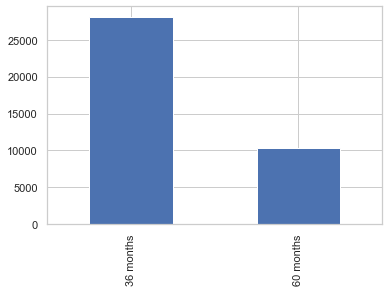

In [162]:
loan_data.term.value_counts().plot.bar()
plt.show()

<h4>int_rate</h4>

-  Interest rate charged on loan amount

<h4>installment</h4>

-  installment given by the borrower every month , as we can see below the installment rate is natturally higher for higher loan amount. Hence taking  loan amount for analysis will suffice for installment as there is a natural trend between them.

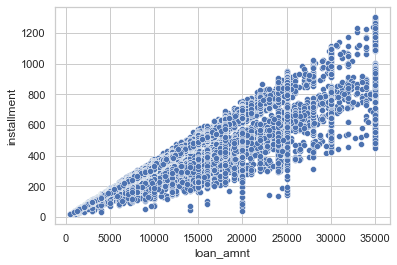

In [163]:
sns.scatterplot(loan_data.loan_amnt,loan_data.installment)
plt.show()

<h4>grade</h4>

-  grade given by LC for the risk catagorization . We can clearly see the statistical significance , .i.e the people in higher grade category is lesser hence we are keeping this categorical variable.

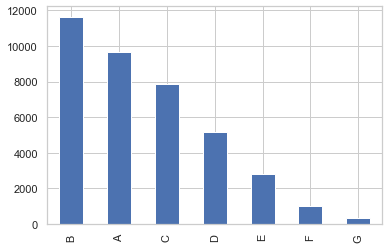

In [164]:
loan_data.grade.value_counts().plot.bar()
plt.show()

<h4>sub_grade</h4>

-  furthure division of grade(redundant column) , as we see the risk category is again sub divided into 1,2,3,4,5 categories each. , hence we are removing it.

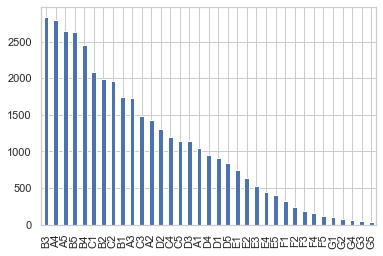

In [165]:
loan_data.sub_grade.value_counts().plot.bar()
plt.show()

<h4>emp_length</h4>

-  years of experience of the borrower. This might signifies the lesser years of experience might be an indicator of high risk and hence LC is rejecting the loan application.

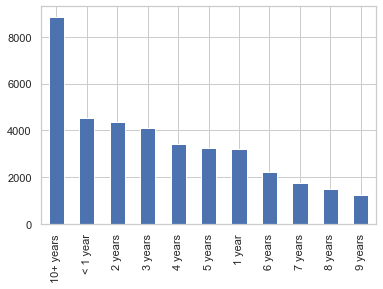

In [166]:
loan_data.emp_length.value_counts().plot.bar()
plt.show()
#needs reanalysis

<h4>home_ownership</h4>

-  type of home ownership the borrower is having (rent, own , mortgage , none) , this variable also seems to have significance over risk as it is a borrowers attribute and we can see a trend here as the amount of population is decreasing  in order of rent>mortage>own>other>none home ownership.

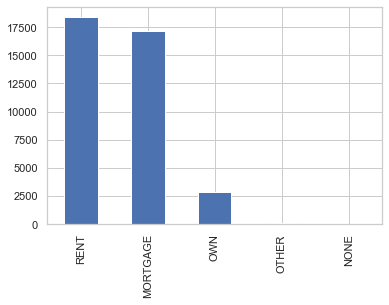

In [167]:
loan_data.home_ownership.value_counts().plot.bar()
plt.show()

<h4>annual_inc</h4>

-  annual income of the borrower. We are keeping annual income for the analysis as it is clearly an indicator of the credit worthiness of the borrower.

<h4>verification_status</h4>

-  whether the income source is verified or not by LC.(verified, verified source, not verified)

<AxesSubplot:>

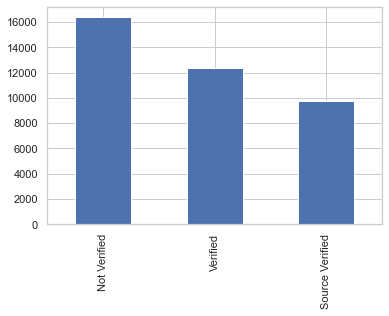

In [168]:
loan_data.verification_status.value_counts().plot.bar()

<h4>issue_d</h4>

-  issue date of the loan application.

<h4>loan_status</h4>

-  loan status of the borrower(current, charged off, fully paid) (This is our target variable), as this variable describes whether the borrower has already paid or charged off .
<h4>pymnt_plan</h4>

-  the payment plan agreement given by the borrower. (This column should be n/y)(in our case we have 100% of the entries with n)
(hence remove)

In [169]:
loan_data.pymnt_plan.value_counts()

n    38465
Name: pymnt_plan, dtype: int64

<h4>url</h4> 

-  the url created for the borrowers online account by LC (not necessary for risk analysis) , we really can not get any credit worthiness  related trend out of the url variable. 

In [170]:
#phase 1 clean the data set .i.e remove the unnecessary and redundant columns of the data set.
loan_data=loan_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade','pymnt_plan', 'url'],axis=1)

In [171]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

<h4>purpose</h4>

-  purpose of taking loan (there are a few selected categories hence can be a categorical variable)

<AxesSubplot:>

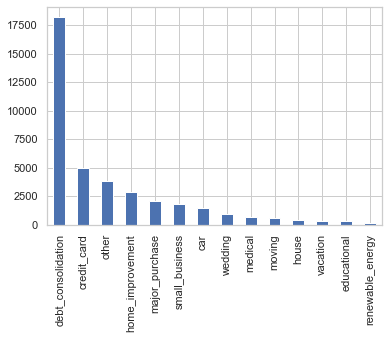

In [172]:
loan_data.purpose.value_counts().plot.bar()

<h4>title</h4>

-  description of the borrower about the purpose (many unique values to consider as categorical variable)(not necessary for risk analysis)

In [173]:
len(loan_data.title.unique())

19047

<h4>zip_code</h4>

-  zip code of the borrowers location (missing last two digits)(hence remove)(not necessary for risk analysis)
<h4>addr_state</h4>

- adress state of the borrower (can serve as a good categorical variable)

In [174]:
loan_data.addr_state.value_counts()

CA    6883
NY    3692
FL    2765
TX    2659
NJ    1815
IL    1485
PA    1478
VA    1371
GA    1351
MA    1297
OH    1185
MD    1023
AZ     829
WA     805
CO     766
NC     757
CT     729
MI     685
MO     659
MN     589
NV     481
SC     464
WI     437
OR     436
AL     432
LA     426
KY     320
OK     292
KS     259
UT     252
AR     235
DC     212
RI     196
NM     183
HI     169
WV     167
NH     161
DE     110
WY      79
MT      79
AK      78
SD      62
VT      54
MS      19
TN      17
ID       6
IN       6
IA       5
NE       3
ME       2
Name: addr_state, dtype: int64

<h4>dti</h4>

- debt to income ratio(gross debt /gross income of borrower) , the more lower the dti is the more lower the risk .Hence we can use this for credit worthiness estimation.

<h4>delinq_2yrs</h4>

-  when a borrower do not pay the due amount of the loan almost 30 days over a scheduled date then he/she is considered as deliquent , this information is a strong indicator of the credit worthiness but most of the population seems to be distributed towards 0 hence i am not considering this for analysis.(not necessary for risk analysis)

In [175]:
#getting the deliquency in 2years population count in percentage to ease the comparision
loan_data.delinq_2yrs.value_counts()/len(loan_data.index)*100

0     89.117379
1      8.350448
2      1.723645
3      0.553750
4      0.153386
5      0.054595
6      0.025998
7      0.010399
8      0.005200
9      0.002600
11     0.002600
Name: delinq_2yrs, dtype: float64

<h4>inq_last_6mths</h4>

-  number of time the customer inquired about the loan in past 6 months (not necessary for risk analysis)

<h4>open_acc</h4>

-  number of open credit accounts of borrower  
<h4>pub_rec</h4>

-  A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts borrowers ability to qualify for the loan. but most of the population donot have any derogatory public record.  (not necessary for risk analysis)

In [176]:
loan_data.pub_rec.value_counts(normalize=True)

0    0.948499
1    0.049994
2    0.001274
3    0.000182
4    0.000052
Name: pub_rec, dtype: float64

<h4>revol_bal</h4>

-  revolving balance is the outstanding amount of the borrower over credit limit which gets revolved around the next payment periord on a fees depending on the amount and interest rate so this should be risky and should be evaluated for risk analysis.we will see whether these people are the charge off contributers. 
<h4>revol_util</h4>

-  what percentage of revolving amount the borrower is using against his credit limit , experts suggestion is always limit the revolving balance utilization below 30%. 
<h4>total_acc</h4>

-  total number of accounts the borrower is having .(not necessary for risk analysis)
<h4>initial_list_status</h4>

-  if we see all the values of the column is 'f' hence it's a biased distribution (not necessary for risk analysis)

In [177]:
loan_data.initial_list_status.value_counts(normalize=True)

f    1.0
Name: initial_list_status, dtype: float64

<h4>out_prncp</h4>

-  Outstanding principal=the remaining amount of the original loan + interest.It is going to be paid later . so,does not directly induce any risk .(not necessary for risk analysis)
<h4>total_pymnt</h4>

-  total payment made by the borrower (not necessary for risk analysis)

<h4>total_pymnt_inv</h4>

-  total payment made by the borrower to investors(not necessary for risk analysis)
<h4>total_rec_prncp</h4>

-  total principle amount paid by the customer(not necessary for risk analysis)
<h4>total_rec_int</h4> 

-  total recived interest (not necessary for risk analysis)
<h4>total_rec_late_fee</h4>

-  total recived late fees  (not necessary for risk analysis)(#todo re analyse)
<h4>recoveries</h4>

- total recovered amount after charged off (not necessary for risk analysis)

In [178]:
# phase 2 let's remove the columns which are not necessary for our analysis
remove_list=['title','zip_code','delinq_2yrs','inq_last_6mths','pub_rec','total_acc','initial_list_status','out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries']
loan_data=loan_data.drop(remove_list,axis=1)

In [179]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util', 'out_prncp_inv',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'tax_liens'],
      dtype='object')

<h4>earliest_cr_line</h4>
-  eirliest credit line is the year when the borrower opened his/her credit account with the lending comapany.(can be taken as an indicator of years a customer is with the company if equate with the application issue date)
<h4>out_prncp_inv</h4>
-  out standing principle amount to investors (not necessary for risk analysis)
<h4>collection_recovery_fee</h4>
-  post charge off collection fees (not necessary for risk analysis)
<h4>last_pymnt_d</h4>
-  date of last payment by the borrower  (not necessary for risk analysis)
<h4>last_pymnt_amnt</h4>
-  last payment amount by the borrower. (not necessary for risk analysis)
<h4>last_credit_pull_d</h4>
- last date of credit worthiness check by the lender company , date by it self does not contribute anything to risk analytics.(not necessary for risk analysis)
<h4>collections_12_mths_ex_med</h4>
-  number of collections in 12 months except medical loans (not necessary for risk analysis)
<h4>policy_code</h4>
-  if we check  policy code of complete population then we can see it's 1 for all  hence remove.(not necessary for risk analysis)

In [180]:
loan_data.policy_code.value_counts()

1    38465
Name: policy_code, dtype: int64

<h4>application_type</h4>
-  application type column is completely filled with individual application type hence distribution is biased (not necessary for risk analysis)

In [181]:
loan_data.application_type.value_counts()

INDIVIDUAL    38465
Name: application_type, dtype: int64

<h4>acc_now_delinq</h4>
-  the number of deliquency of the borrower in all the open account.(zero valued column) 

In [182]:
loan_data.acc_now_delinq.value_counts()

0    38465
Name: acc_now_delinq, dtype: int64

<h4>chargeoff_within_12_mths</h4>
-  number of charged offs with in 12 months.(zero valued column) 

In [183]:
loan_data.chargeoff_within_12_mths.value_counts()

0.0    38465
Name: chargeoff_within_12_mths, dtype: int64

<h4>delinq_amnt</h4>
-  The past-due amount owed for the account on which the borrower is now delinquent .(not necessary for risk analysis)
<h4>tax_liens</h4>
-  (zero valued column)


In [184]:
loan_data.tax_liens.value_counts()

0.0    38465
Name: tax_liens, dtype: int64

In [185]:
#phase 3 let's remove the columns which are not necessary for our analysis
remove_list=['out_prncp_inv','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','last_credit_pull_d']
loan_data=loan_data.drop(remove_list,axis=1)

<h4>Finally we have gotten our choosen columns over which we can proceed our analysis.</h4>

In [186]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util'],
      dtype='object')

<h1><center>Remove outliers if any<center></h1>

<h3>let's see in our data set is there any outliers</h3>

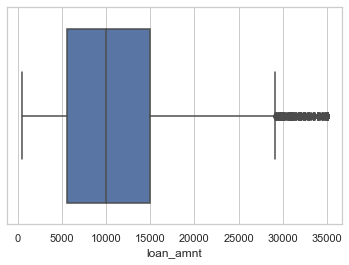

In [187]:
sns.boxplot(loan_data['loan_amnt'])
plt.show()

<b>Observation-:</b>we can see some out liers who have taken more than ~29000$ as loan amount. Let's see the distribution in more depth

In [188]:
print(len(loan_data[loan_data.loan_amnt>=29000]))
print((len(loan_data[loan_data.loan_amnt>=29000])/len(loan_data.index))*100)
loan_data.loan_amnt.describe()

1235
3.2107110360067597


count    38465.000000
mean     11311.890680
std       7461.531202
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<b>Observation-:</b>turns out there are 1205 such rows who have taken more than 29000 loan amount and the total population is only 3.21% percent 
of the entire population. Hence let's remove the people who are taking more than 29000$ loan

In [189]:
 loan_data=loan_data[ loan_data.loan_amnt<29000 ]

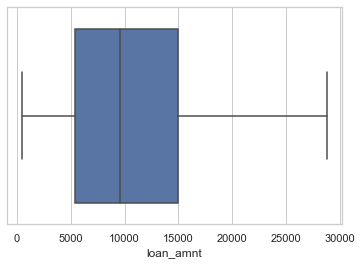

In [190]:
sns.boxplot(loan_data['loan_amnt'])
plt.show()

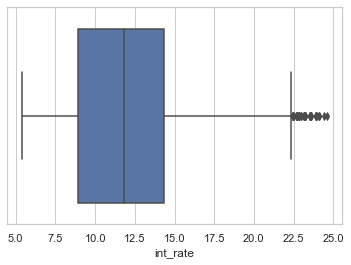

In [191]:
sns.boxplot(loan_data['int_rate'])
plt.show()

<b>Observation-:</b>We can see there are some outliers above ~22% of interest rate ,let's try to remove them

In [192]:
loan_data=loan_data[loan_data.int_rate<22]

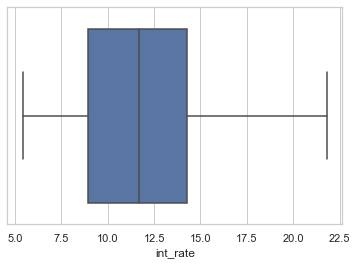

In [193]:
sns.boxplot(loan_data['int_rate']) 
plt.show()

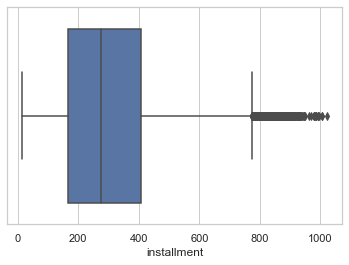

In [194]:
sns.boxplot(loan_data['installment'])
plt.show()

<B>Observation-:</B> We can see there are some outliers after ~730 , let's try to remove them

In [195]:
#let's treat installment outliers
loan_data=loan_data[loan_data.installment<=730]

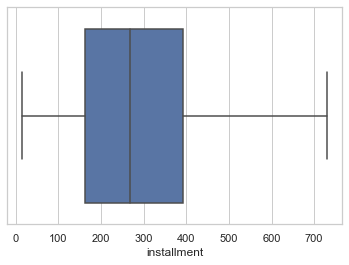

In [196]:
sns.boxplot(loan_data.installment)
plt.show()

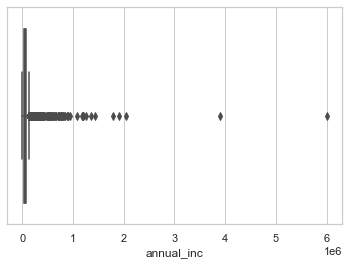

In [197]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

<B>observation-:</B> We can see there are some out liers above 200000

In [198]:
#let's treat annual income out liers
loan_data=loan_data[loan_data.annual_inc<200000]

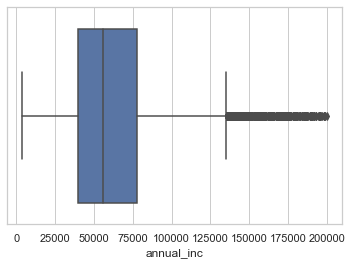

In [199]:
sns.boxplot(loan_data.annual_inc)
plt.show()

<B>Observation</B> -: still there are many outliers above ~127000 

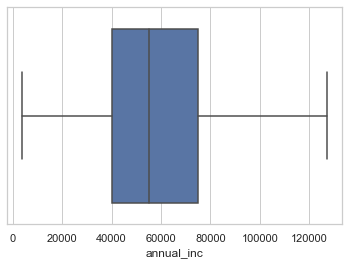

In [200]:
loan_data=loan_data[loan_data.annual_inc<127000]
sns.boxplot(loan_data.annual_inc)
plt.show()

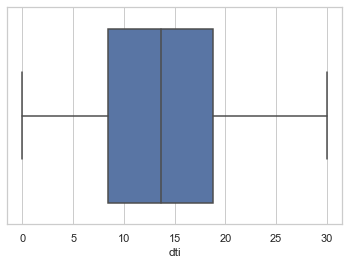

In [201]:
sns.boxplot(loan_data['dti']) #there are no outliers in dti 
plt.show()

<B>Observation-:</B> Here we can see the dti is perfectly spread accross population 

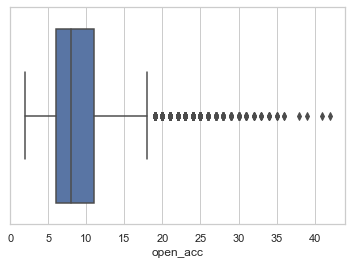

In [202]:
#let's treat the outliers in number of open account for borrower
sns.boxplot(loan_data['open_acc'])
plt.show()

We can see there are some outliers above ~18 let's remove them

In [203]:
loan_data=loan_data[loan_data.open_acc<18]

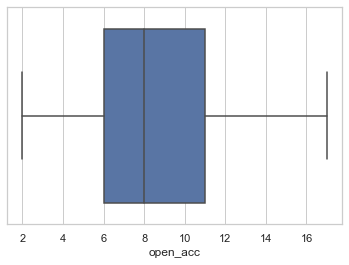

In [204]:
sns.boxplot(loan_data['open_acc'])
plt.show()

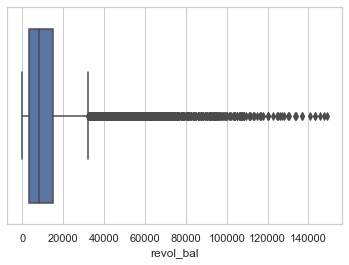

In [205]:
sns.boxplot(loan_data['revol_bal'])
plt.show()

<B>Observation-:</B>We can see there are some outliers above ~27500

In [206]:
loan_data=loan_data[loan_data.revol_bal<27500]

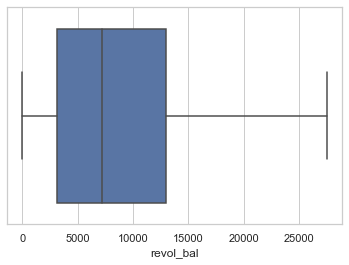

In [207]:
sns.boxplot(loan_data.revol_bal)
plt.show()

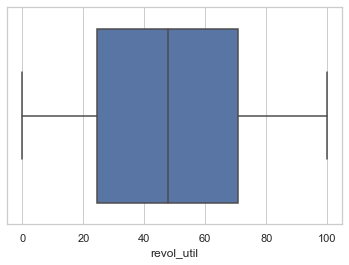

In [208]:
sns.boxplot(loan_data['revol_util'])#revolve balance utilization does not seems to have any outliers
plt.show()

<B>Observation-:</B>  We can see there are no outliers in revol_util column , data is equally distributed

<h1><center>Do univariate analysis to see further distribution of data accross population</center></h1>

In [209]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'revol_bal', 'revol_util'],
      dtype='object')

-  we have numerical columns such as : loan_amnt , int_rate , installment , annual_inc , dti , open_acc , revol_bal , revol_util
- And categorical variables such as :term , grade , emp_length , home_ownership , verification_status , loan_status , purpose , addr_state 
- And two date columns : issue_d , earliest_cr_line

<h3>Let's analyse the numerical variables</h3>

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

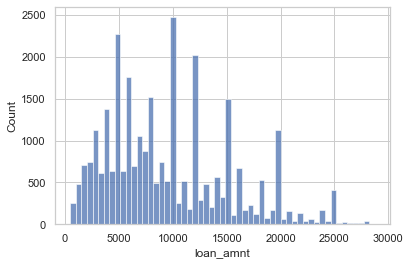

In [210]:
sns.histplot(loan_data.loan_amnt)

In [211]:
loan_data.loan_amnt.describe()

count    29846.000000
mean      9556.716980
std       5677.870923
min        500.000000
25%       5000.000000
50%       8400.000000
75%      13000.000000
max      28750.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

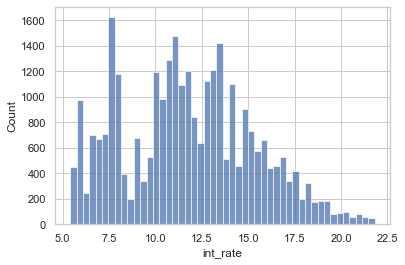

In [212]:
sns.histplot(loan_data.int_rate)

In [213]:
loan_data.int_rate.describe()

count    29846.000000
mean        11.773942
std          3.566466
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         21.820000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='installment', ylabel='Count'>

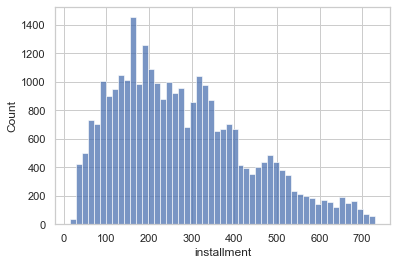

In [214]:
sns.histplot(loan_data.installment)

In [215]:
loan_data.installment.describe()

count    29846.000000
mean       277.878478
std        155.534515
min         15.690000
25%        156.480000
50%        252.790000
75%        373.787500
max        729.600000
Name: installment, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

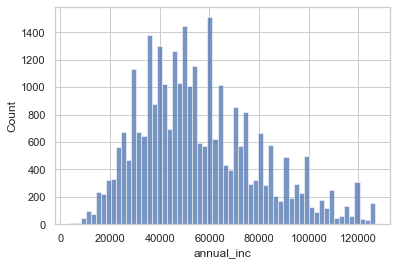

In [216]:
sns.histplot(loan_data.annual_inc)

In [217]:
loan_data.annual_inc.describe()

count     29846.000000
mean      56012.417382
std       24127.120905
min        4000.000000
25%       38000.000000
50%       52000.000000
75%       70000.000000
max      126600.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

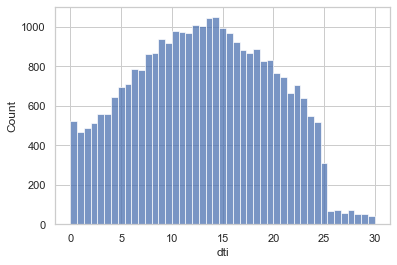

In [218]:
sns.histplot(loan_data.dti)

<h4>we can see count is consistently decreasing after dti=15 as a higher dti would have 
made the borrower credit worthiness down.</h4>

In [219]:
loan_data.dti.describe()

count    29846.000000
mean        13.058966
std          6.660632
min          0.000000
25%          7.910000
50%         13.100000
75%         18.260000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

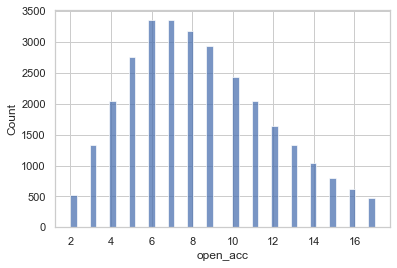

In [220]:
sns.histplot(loan_data.open_acc)

In [221]:
loan_data.open_acc.describe()

count    29846.000000
mean         8.401126
std          3.504413
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         17.000000
Name: open_acc, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

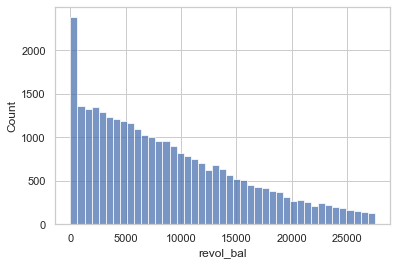

In [222]:
sns.histplot(loan_data.revol_bal)

<h4>we can see the count is decreasing with a incrementation of revolving balance as
higher revolving amount contributes to lesser credit worthiness of the applicants. hence rejection of loan.</h4>

In [223]:
loan_data.revol_bal.describe()

count    29846.000000
mean      8648.884943
std       6751.628172
min          0.000000
25%       3079.250000
50%       7201.000000
75%      13008.000000
max      27496.000000
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

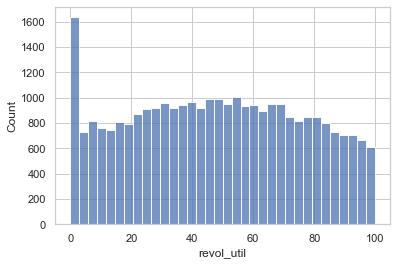

In [224]:
sns.histplot(loan_data.revol_util)

In [225]:
loan_data.revol_util.describe()

count    29846.000000
mean        47.781457
std         28.201207
min          0.000000
25%         24.400000
50%         47.800000
75%         70.900000
max         99.900000
Name: revol_util, dtype: float64

<h3>Let's analyse the categorical variables term , sub_grade , emp_length , home_ownership , verification_status , loan_status , purpose , addr_state</h3>

<AxesSubplot:ylabel='term'>

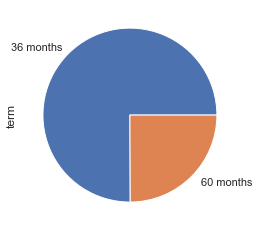

In [226]:
loan_data.term.value_counts().plot.pie()

<h4> Take away-: We can clearly see the number of 36 months term loans are issued more than the 60 months loan</h4> 

<AxesSubplot:>

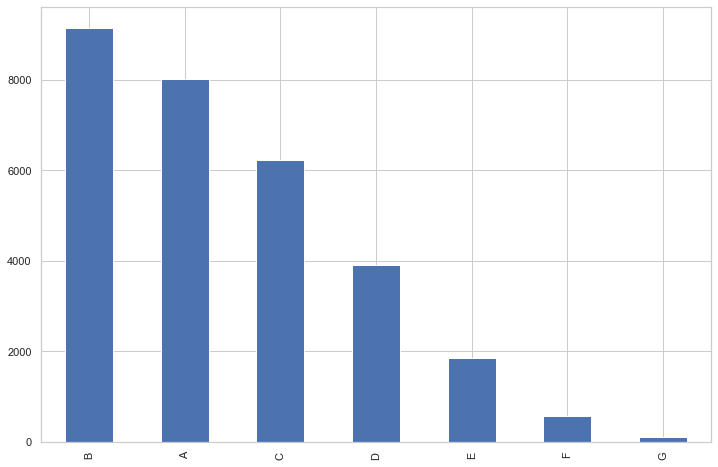

In [227]:
plt.figure(figsize=[12,8])
loan_data.grade.value_counts().plot.bar()

<h4> Take away-: We can clearly see there is a fall in a number in loan issue when the risk grade increases from A to g </h4> 

<AxesSubplot:>

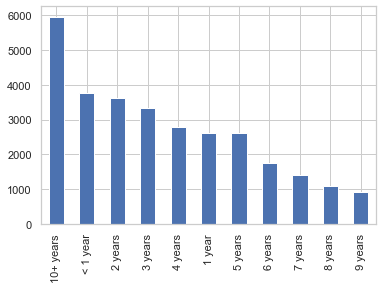

In [228]:
loan_data.emp_length.value_counts().plot.bar()

<h4> Take away-: We can  see the number of loan issued is significantly higer for 10+years experienced employees and least for 9 years experienced employees  </h4> 

<AxesSubplot:>

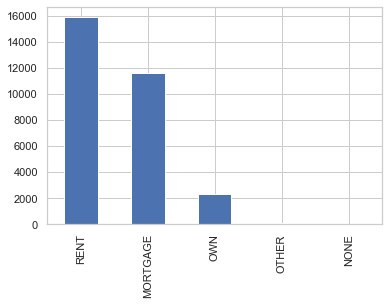

In [229]:
loan_data.home_ownership.value_counts().plot.bar()

We can see there are 5 categories in Homeowner ship , let's understand what are they:-
-  Rent-: Borrower is staying at a rental home
-  Mortgage-: Borrower is staying at a Mortgage home ,<I> for which he/she have to pay  scheduled installments to the owner of the home  </I>
-  Own-: Borrower is staying at his own home
-  Other and none are representing that the homeownership is  not mentioned while collecting data from the borrower.
-  Take  away -: number of loan issue is significant for rent and mortgage. 

<AxesSubplot:>

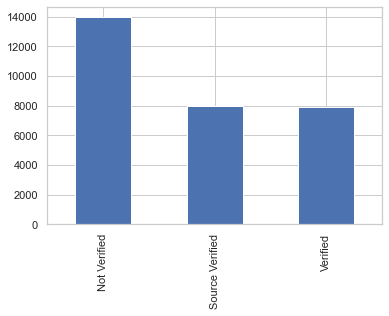

In [230]:
loan_data.verification_status.value_counts().plot.bar()

<h4> Take away-: We can  see the number of loan issued is higher for source verified and verified  income source   (combined)borrowers rather than non verified category </h4

<AxesSubplot:>

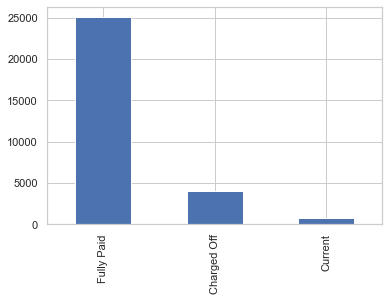

In [232]:
loan_data.loan_status.value_counts().plot.bar()

<B>Modification-:<B> If we observe the current population , who are currently paying the EMI amount are not going to help us in our analysis , as they are not categorized in either of the extremes (fully paid , charged off), which gives us a pattern of default.Hence let's remove the current paying population

In [234]:
loan_data=loan_data[~(loan_data.loan_status=='Current')]

<AxesSubplot:>

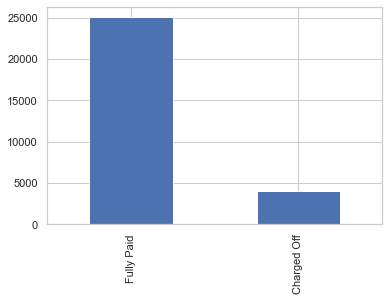

In [235]:
loan_data.loan_status.value_counts().plot.bar()

In [238]:
loan_data.loan_status.value_counts(normalize=True)

Fully Paid     0.860118
Charged Off    0.139882
Name: loan_status, dtype: float64

<h4> Take away-: We can  see almost 86% of the applicants have fully paid their loan amount and almost 14% of the population is charged off </h4>

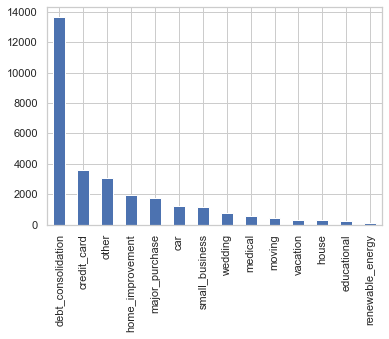

In [90]:
loan_data.purpose.value_counts().plot.bar()
plt.show()

<B>Take away-:</B>we can see  most loans has been issued for the purpose of debit consolidation , while renewable energy is falling in the least number of issued loan.
what is debit consolidation ?
-  Debt consolidation means taking out a new loan to pay other debts.

<AxesSubplot:>

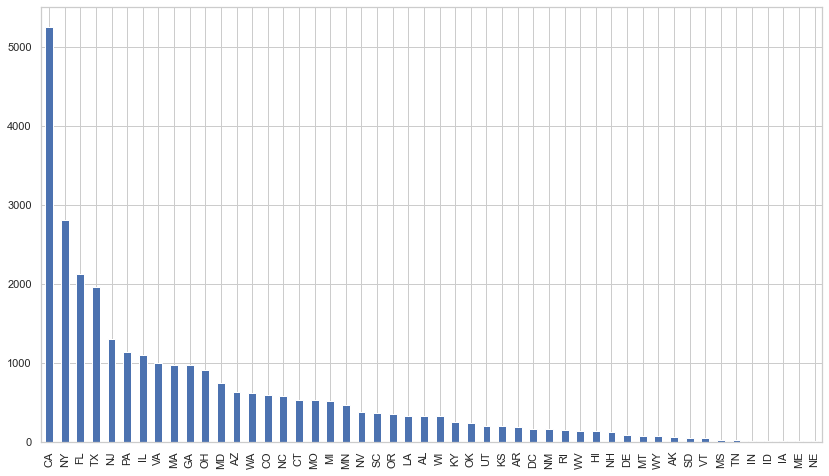

In [91]:
plt.figure(figsize=[14,8])
loan_data.addr_state.value_counts().plot.bar()

<B>Take away-:</B>Here we see most of the loan issued to the resident of CA state while ME is the least

<h1><center> Bivariate analysis to describe the relationship between the  target variable and important 
    attributes</center></h1>

<h4> As per problem statement our target variable is the loan_status column as it gives us the information about whether the borrower is charged off , let's analyse which variables are inducing a higher charge off rate (bivariately) and which are insignificant for furthure analysis </h4> 

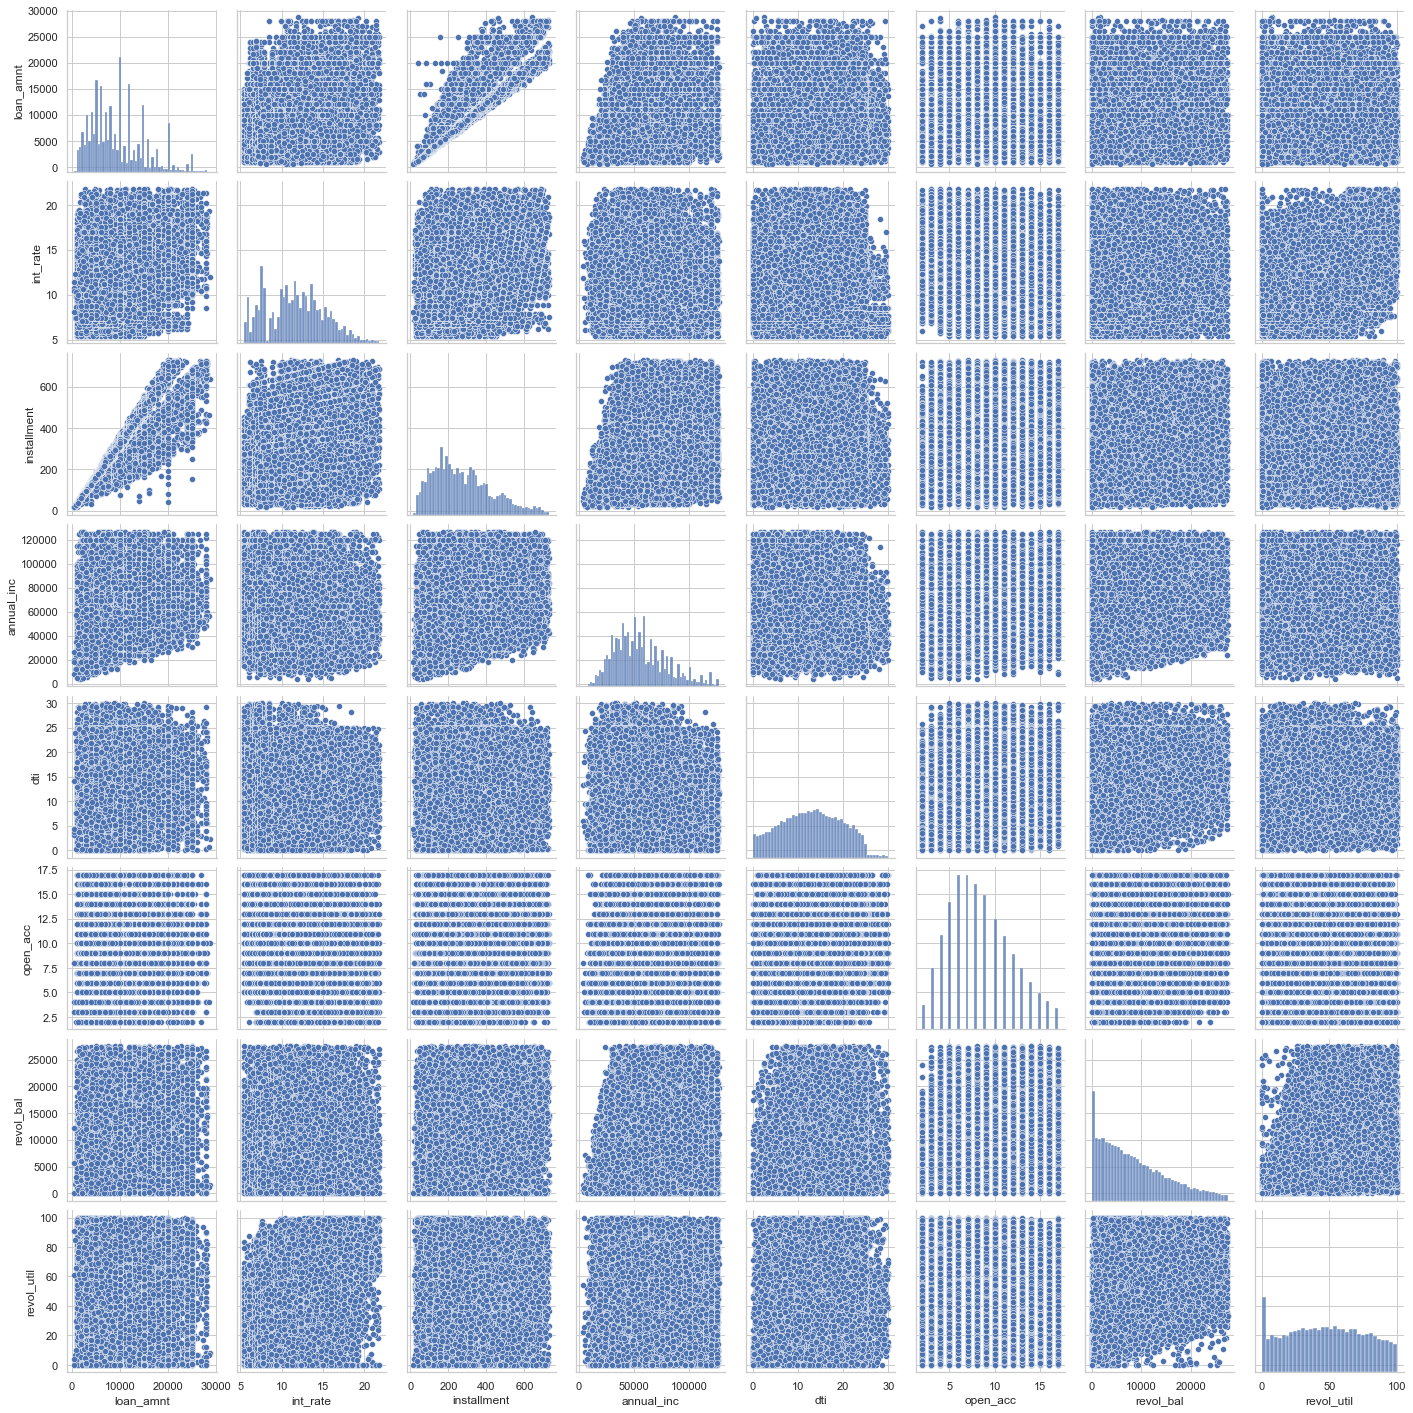

In [92]:
#Let's have a bird eye view on the numerical values of data set.
sns.pairplot(loan_data)

<h4>from above plot we can not really see any trend clearly except the loan amount and installment.</h4>

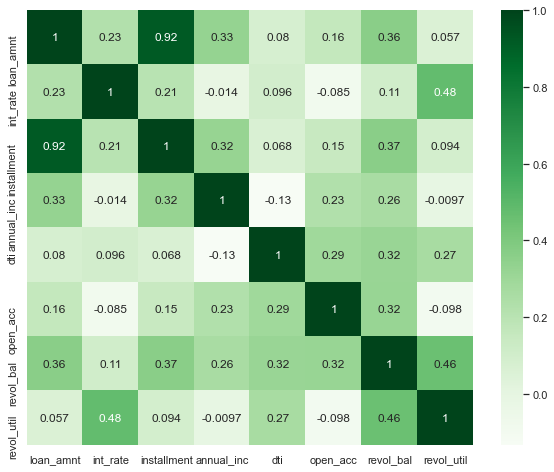

In [93]:
plt.figure(figsize=[10,8])
sns.heatmap(loan_data.corr(),cmap='Greens',annot=True)
plt.show()

Above is an heat map showing correlationship between all numeric variables 

<I><B>Findings:- we can see there is a good correlation ship of loan amount with installment , annual income , revolving balance, and loan amount have a positive correlation ship with all loan and borrower numeric attributes</I></B> 

<I><B>we can see there is a good correlation ship of interest rate with revolving amount utilization and negative correlationship with open account </I></B>

<I><B>we can see there is a good correlationship of installment with loan amount , annual income , revolving balancle  </I></B>

<I><B>we can see there is a little correlation ship of annual income  with installment and loan amount also there is a little correlationship with open accounts number and revolving balance</I></B>

<I><B>we can see there is a little correlation ship of dti with revolving balance utilization , revolving balance amount, and number of open accounts ,and there is a negative correlationship with annual income</I></B>

<I><B>we can see there is a little correlation ship of open accounts number  with dti ,annual income , revolving balance </I></B>

<I><B>we can see there is a good positive correlation ship of revolving balance with all the numeric attributes except interest rate </I></B>

<I><B>we can see there is a good positive correlation ship of revolving util with interest rate , revolving balance ,dti and negative correlation ship with open account numbers</I></B>

<I><B><U>But our problem statement is to find out relation ship between the loan status (target variable) and all other categorical and numeric borrower and loan attributes</U></B></I>

In [94]:
loan_data.groupby('loan_status').loan_amnt.mean()

loan_status
Charged Off    10284.723587
Fully Paid      9303.109766
Name: loan_amnt, dtype: float64

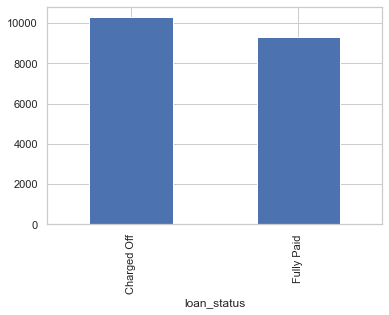

In [95]:
loan_data.groupby('loan_status').loan_amnt.mean().plot.bar()
plt.show()

<B>Observation-:</B>above analysis shows charged off population stands at a higher mean loan amount almost with a differnce of 1000$ than the fully paid borrowers , which can be a interesting fact for our analysis as <I>more higher loan amount might be a causation of charged off.</I>

In [96]:
loan_data.groupby('loan_status').int_rate.mean()

loan_status
Charged Off    13.516870
Fully Paid     11.402216
Name: int_rate, dtype: float64

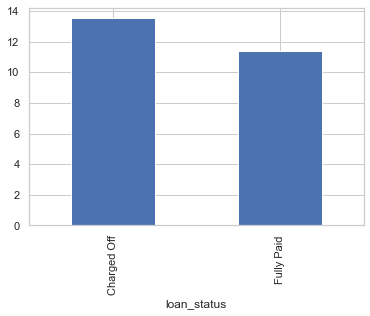

In [97]:
loan_data.groupby('loan_status').int_rate.mean().plot.bar()
plt.show()

<B>Observation-:</B>As the mean of intrest rate for charged off population is more than the fully paid population in turn the interest rate follows the same distribution .i.e the people who are charged off are  paying a higher interest rate than the fully paid borrowers almost by 2%

In [98]:
loan_data.groupby('loan_status').installment.mean()

loan_status
Charged Off    286.417106
Fully Paid     275.014737
Name: installment, dtype: float64

<AxesSubplot:xlabel='loan_status'>

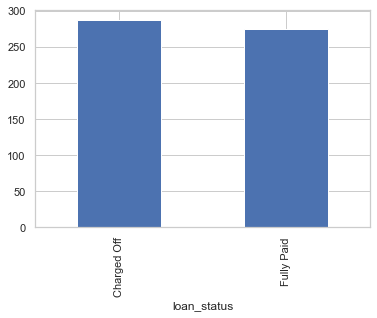

In [99]:
loan_data.groupby('loan_status').installment.mean().plot.bar()
plt.show()

<B>Observation-:</B>As the mean of installments for charged off population is more than the fully paid population in turn the mean of installment follows the same distribution .i.e the people who are charged off are  paying a higher installment than the fully paid borrowers almost by 11$ up

As the installments and interest rate are complementary to the loan amount <I> let's keep the loan amount as a major variable for induction of charged off </I>

In [100]:
loan_data.groupby('loan_status').annual_inc.mean()

loan_status
Charged Off    51208.820113
Fully Paid     56679.782123
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='loan_status'>

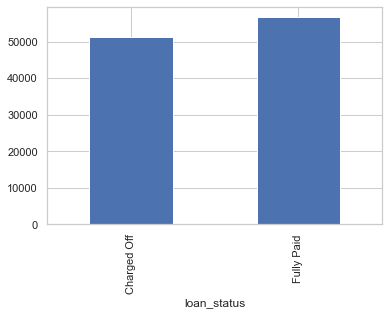

In [101]:
loan_data.groupby('loan_status').annual_inc.mean().plot.bar()
plt.show()

<B>Observation-:</B>as per the above analysis we can see the defaulters are having less annual income than the fully paid customers. Hence <I> let's keep annual income as a major attribute contributing to default too</I>

In [102]:
loan_data.groupby('loan_status').dti.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4070.0,13.694550,6.620466,0.0,8.73,14.00,19.0375,29.85
Fully Paid,25026.0,12.906828,6.653497,0.0,7.75,12.91,18.1000,29.99


<AxesSubplot:xlabel='loan_status'>

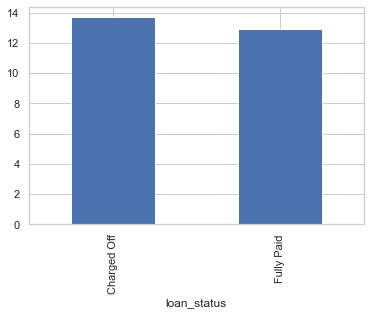

In [103]:
loan_data.groupby('loan_status').dti.mean().plot.bar()

<B>Observation-:</B>Though for Debt to income ratio mean is almost equal to the mean of the mean of fully paid customers , but we can not ignore there is a very slight gap of almost 1% . And it might be a risk contributing factor too in a larger scale .  Hence <I>let's keep dti as a major variable for the contribution to charged off too.</I>

In [104]:
loan_data.groupby('loan_status').open_acc.mean()

loan_status
Charged Off    8.264128
Fully Paid     8.405778
Name: open_acc, dtype: float64

<B>Observation-:</B>open accounts of the borrower does not seems like contributing to the charged off population much .<I>Hence let's not treat this as a risk contributer</I>

In [105]:
loan_data.groupby('loan_status').revol_bal.mean()

loan_status
Charged Off    8925.362162
Fully Paid     8537.202589
Name: revol_bal, dtype: float64

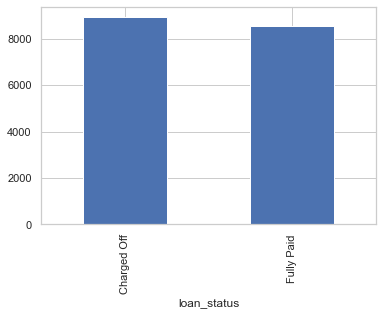

In [106]:
loan_data.groupby('loan_status').revol_bal.mean().plot.bar()
plt.show()

<B>Observation-:</B>we can see the revolving balance is positively contributing to the charged off population <I> hence let's treat this as a major contributer to risk</I>

In [107]:
loan_data.groupby('loan_status').revol_util.mean()

loan_status
Charged Off    54.350263
Fully Paid     46.586370
Name: revol_util, dtype: float64

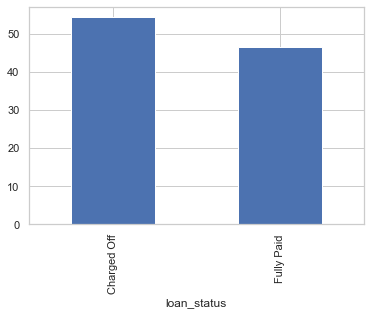

In [108]:
loan_data.groupby('loan_status').revol_util.mean().plot.bar()
plt.show()

<B>Observation-:</B>we can see the revolving balance utilization is significantly contributing to the charged off population <I> hence let's treat this as a major contributer to risk</I>

<h3>Let's see which categorical variables are significantly contributing to the charged off population</h3>

In [109]:
#term , grade , emp_length , home_ownership , verification_status , loan_status , purpose , addr_state

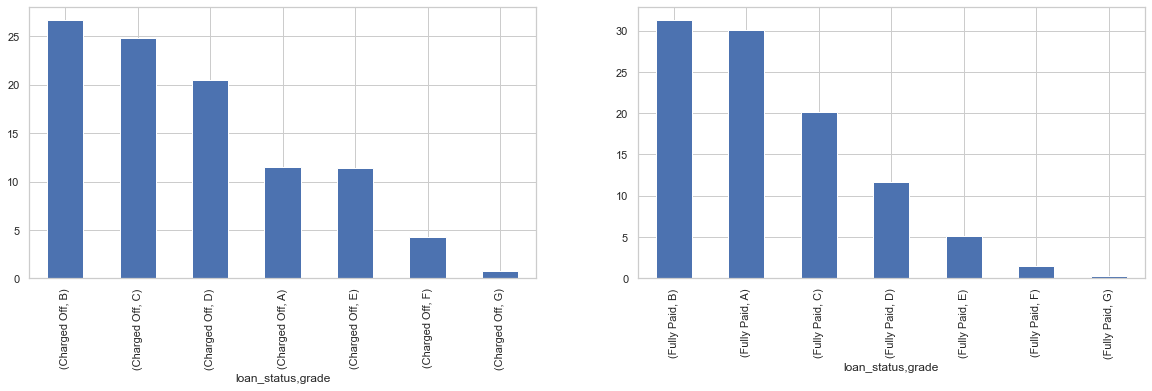

<Figure size 432x288 with 0 Axes>

In [250]:
#converted the frequency of charged off w.r.t grade to percentage scale to easily compare them 
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').grade.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.subplot(1, 2, 2)
#converted the frequency of Fully paid w.r.t grade to percentage scale to easily compare them
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').grade.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.show()
plt.tight_layout()

<B>Observation-:</B>From above two analysis we can clearly observe the following:

-  The A risk category is really high as 29% approx in fully paid category where as in the charged off category it is upto 12% approx 
    
-  If we see the G risk category of both then we can see a  percentage of people as close as 2% approx are lying in the charged off section.while it is as less as 0% approx in case of fully paid section.

-  simmilarly if we see based on the risk categorization then the more risky profiles based on their credit worthiness are being charged off in comparision to their less risky  counter parts
-  Hence <I> let's keep the grade of the applicant as a major risk contributing factor<I>

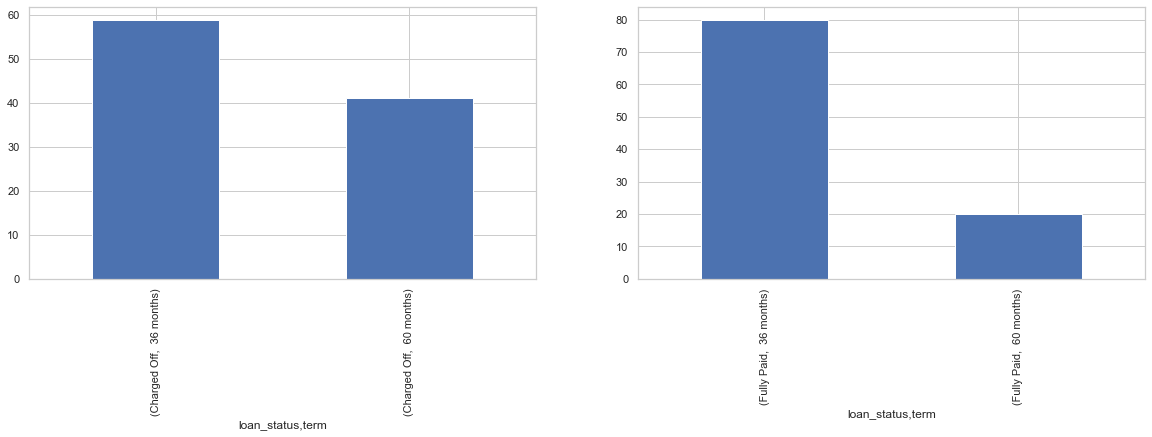

In [251]:
plt.figure(figsize=[20,5])
plt.subplot(1, 2, 1)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').term.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.subplot(1, 2, 2)
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').term.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.show()

<B>Observation-:</B>If we observ above two analysis then we can see , in charged off population the percentage of people are more in 60 months of term than the 60 months term of fully paid section and simillarly the charged off section is having lesser population chossing 36 months term than the fully paid population . 
<I>Hence the term can also serve as an important indicator of risk .</I>

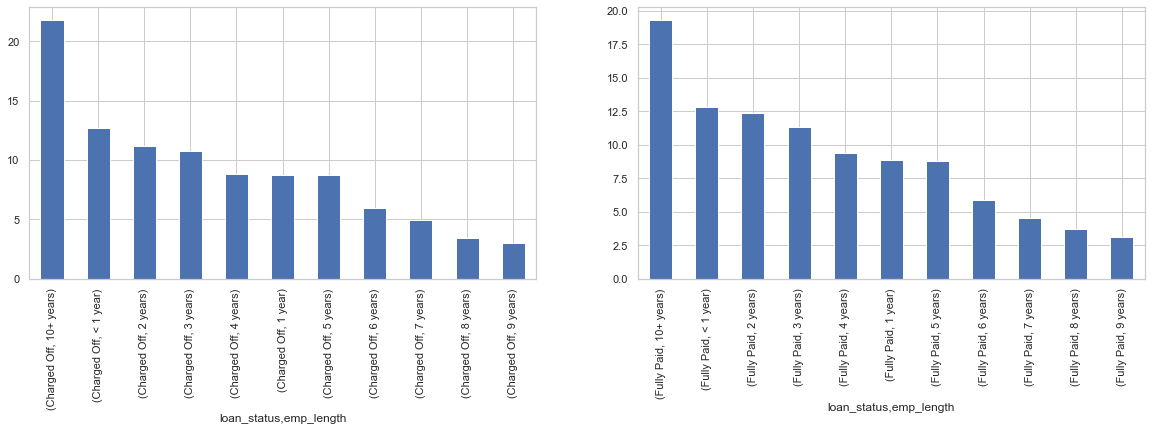

In [254]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').emp_length.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.subplot(1,2,2)
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').emp_length.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.show()

<B>Observation-:</B>Intrestingly we have seen from above analysis that the charged off population contains more percentage of 10+ years experience of empployee than the fully paid population , and other distributions are pretty much simmilar , <I> hence let's not keep the employee length as a strong indicator of risk analysis</I>

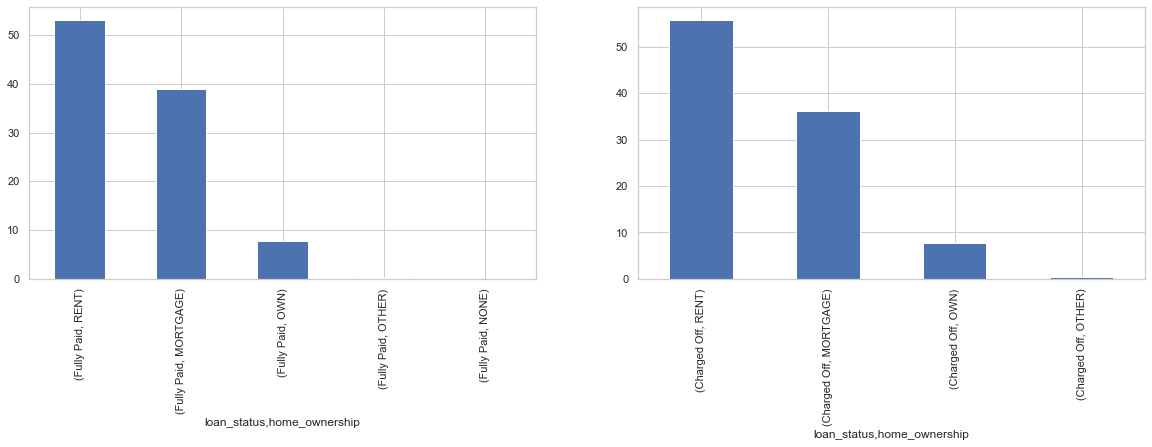

In [255]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').home_ownership.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.subplot(1,2,2)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').home_ownership.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.show()

<B>Observation-:</B>We can see the distribution of home ownership is almost simillar in both charged off and fully paid section . <I>Hence let's not consider it as a risk contributing factor</I>

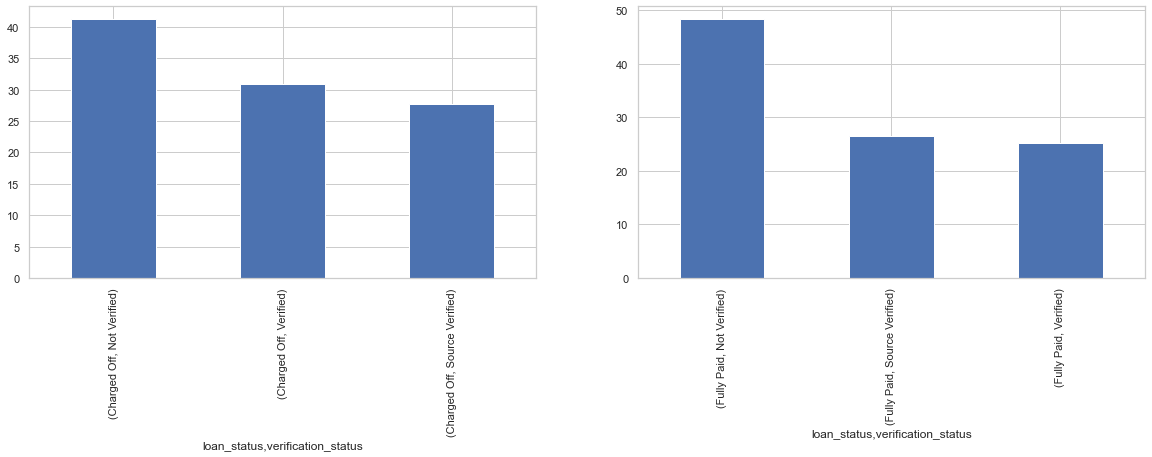

In [257]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').verification_status.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.subplot(1,2,2)
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').verification_status.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.show()

<B>Observation--:</B>From above observations we can see almost 50 % of the population have no verified source of income in fully paid section!!
Which is more than the charged off section. <I>So we can not say this is contributing much to the charged off population.</I>

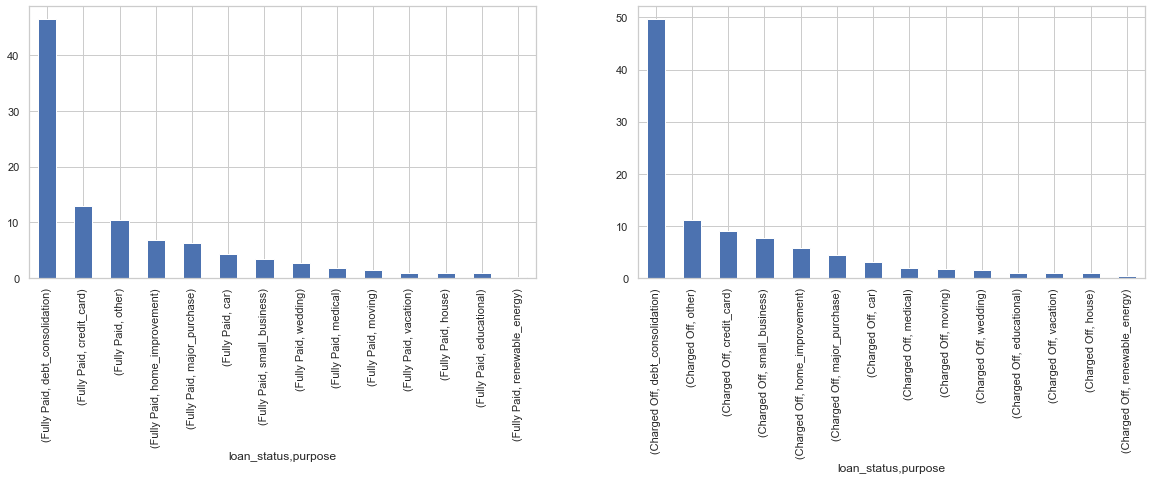

In [258]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').purpose.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()
plt.subplot(1,2,2)
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').purpose.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()
plt.show()

<B>Observation-:</B>We can see the distribution of purpose across the population is simillar in both section <I> hence let's not take this as a contributing factor of the default</I>  

<AxesSubplot:xlabel='loan_status,addr_state'>

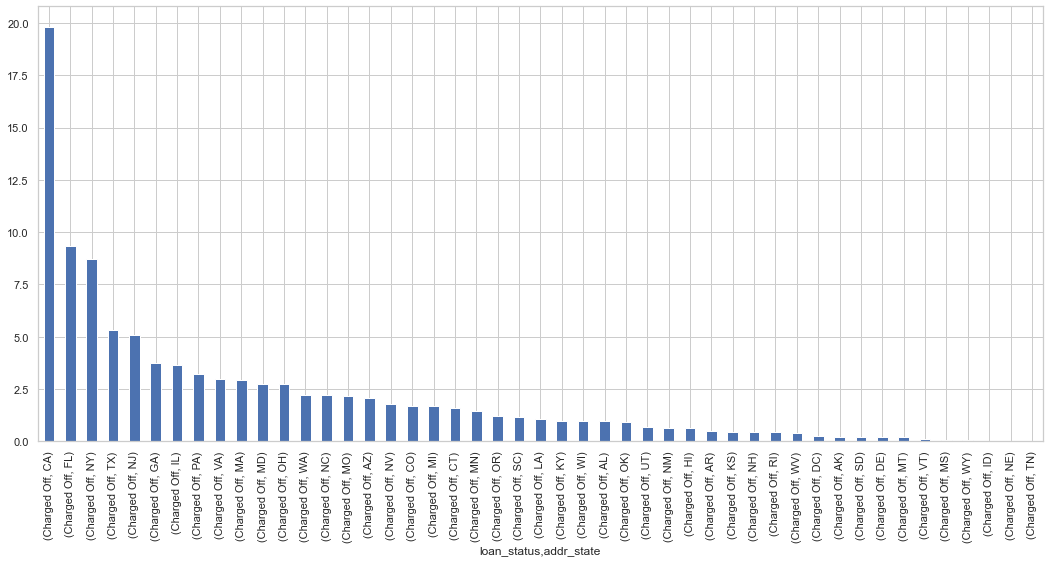

In [122]:
plt.figure(figsize=[18,8])
((loan_data[loan_data.loan_status=='Charged Off'].groupby('loan_status').addr_state.value_counts()/len(loan_data[loan_data.loan_status=='Charged Off']))*100).plot.bar()

<AxesSubplot:xlabel='loan_status,addr_state'>

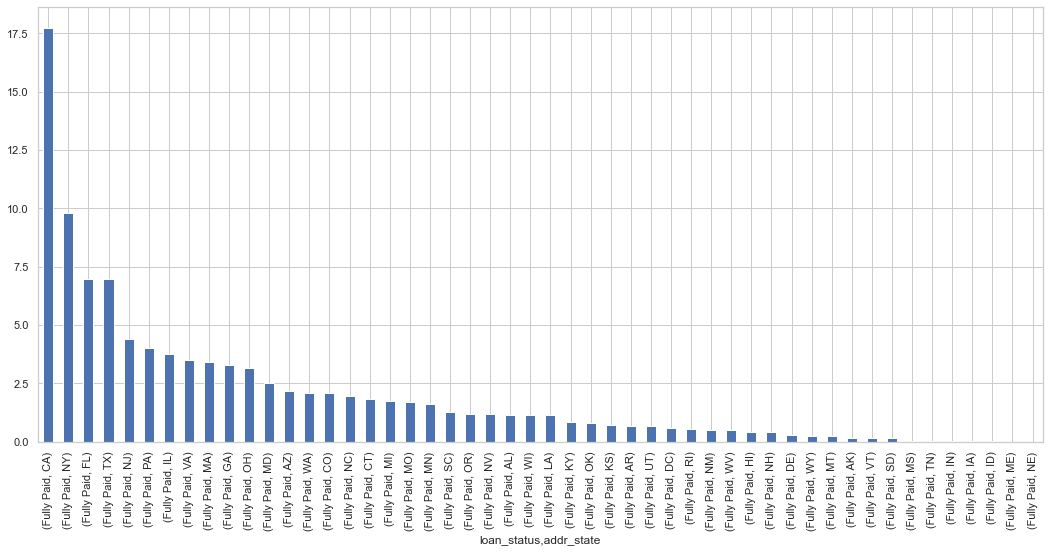

In [123]:
plt.figure(figsize=[18,8])
((loan_data[loan_data.loan_status=='Fully Paid'].groupby('loan_status').addr_state.value_counts()/len(loan_data[loan_data.loan_status=='Fully Paid']))*100).plot.bar()

<B>Observation</B>We can see the distribution of address state across the population is simillar in both section <I> hence let's not take this as a contributing factor of the default</I>  

<center><h3>let's see the major takeaways from bivariate analysis </h3></center>

#### More higher loan amount might be a causation of charged off.
#### Defaulters are having less annual income than the fully paid Borrwers.
#### DTI might be a risk contributing factor.
#### Revolving balance is positively contributing to the charged off population
#### Revolving balance utilization is significantly contributing to the charged off population
#### Grade of the applicant is a major risk contributing factor
#### Term is also serving as an important indicator of risk .

 <center> <h1>Do multivariate analysis to describe the relationship between the target variable and important attributes</h1></center>

In [124]:
#term , grade
#loan amount ,annual income ,dti ,rev_bal,rev_util

In [125]:
table=pd.pivot_table(loan_data,index='loan_status',columns='term',values='loan_amnt',aggfunc=np.mean)
table

term,36 months,60 months
loan_status,,
Charged Off,8149.050897,13344.620442
Fully Paid,8358.835291,13065.350528


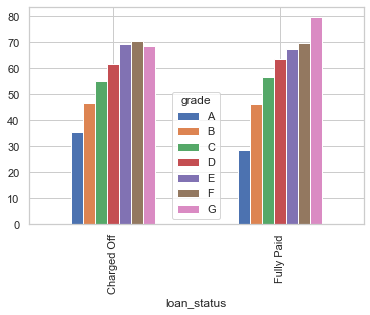

In [239]:
table.plot.bar()
plt.show()

In [127]:
table=pd.pivot_table(loan_data,index='loan_status',columns='grade',values='loan_amnt',aggfunc=np.mean)
table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7536.968085,9788.694853,9880.574827,10547.926683,12541.217672,14895.545977,15455.30303
Fully Paid,8008.543967,9490.078404,9321.004566,10005.994152,12374.157524,13942.229730,15918.00000


<B>Observation-:</B>From above analysis we have observed that in case of lower risk category A have more loan amount for fully paid section than charged off . 
As we go to higher risk categories like B C D E F the charged off populations mean loan amount is more than the Fully paid counter parts.


<AxesSubplot:xlabel='loan_status'>

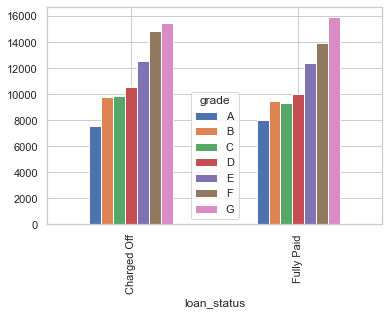

In [128]:
table.plot.bar()

In [129]:
table=pd.pivot_table(loan_data,index='loan_status',columns='term',values='annual_inc',aggfunc=np.mean)
table

term,36 months,60 months
loan_status,,
Charged Off,49032.038907,54327.615421
Fully Paid,55816.055244,60121.099835


<AxesSubplot:xlabel='loan_status'>

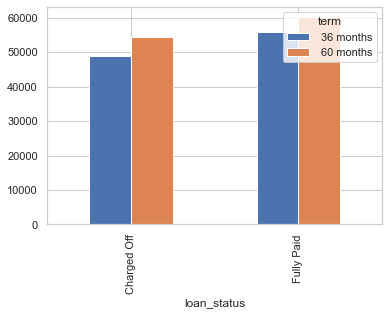

In [130]:
table.plot.bar()

<B>Observation-:</B>From above observation we can see a clear picture , that the annual income of both population under 36  and 60 months are higher than their charged off conterparts , hence annual income is a strong indicator of risk.

In [131]:
table=pd.pivot_table(loan_data,index='loan_status',columns='grade',values='annual_inc',aggfunc=np.mean)
table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,48239.249532,50320.618346,50595.439009,51782.428245,53480.960754,57621.786034,61317.666667
Fully Paid,57937.685829,56103.256975,55241.338263,55371.640874,58912.733691,63375.179378,67189.998933


<AxesSubplot:xlabel='loan_status'>

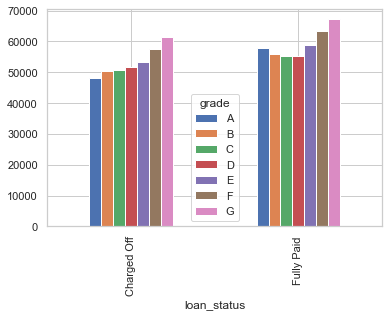

In [132]:
table.plot.bar()

<B>Observation-:</B>As like terms we can also see the annual income of charged off population is significantly lesser across the risk categories rather than their fully paid counter parts

In [133]:
table=pd.pivot_table(loan_data,index='loan_status',columns='term',values='dti',aggfunc=np.mean)
table

term,36 months,60 months
loan_status,,
Charged Off,13.330897,14.215577
Fully Paid,12.672233,13.841518


<B>Observation-:</B>We can see the DTI of charged off population across the terms are higher which suffices the fact that as the debt increases so as the debt to income ratio which induces higher risk of default.  

<AxesSubplot:xlabel='loan_status'>

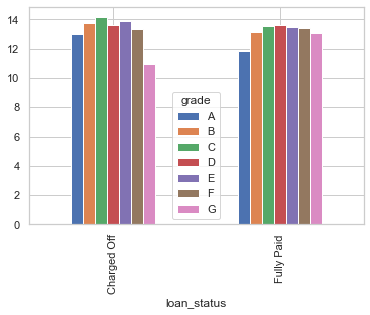

In [134]:
table=pd.pivot_table(loan_data,index='loan_status',columns='grade',values='dti',aggfunc=np.mean)
table.plot.bar()

In [135]:
table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,12.978660,13.734752,14.134202,13.584567,13.904397,13.311724,10.963333
Fully Paid,11.851796,13.130936,13.553206,13.595002,13.476552,13.382757,13.085333


<B>Observation-:</B>We can observe the dti off A,B,C,E risk categories of charged off population is higher than their fully paid counter parts
which tells the lower risk category of the charged off population have more dti rather than their fully paid counter parts. 

In [136]:
table=pd.pivot_table(loan_data,index='loan_status',columns='term',values='revol_bal',aggfunc=np.mean)
table

term,36 months,60 months
loan_status,,
Charged Off,8300.964956,9819.970711
Fully Paid,8289.613147,9523.664808


<AxesSubplot:xlabel='loan_status'>

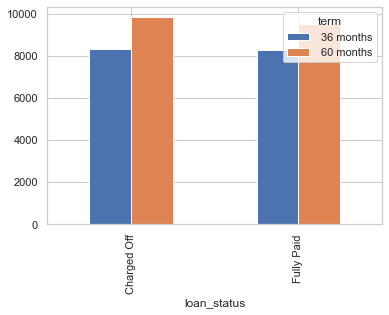

In [137]:
table.plot.bar()

<B>Observation-:</B>if we observe the revolving balance is graeter in charged of population who took 60 months term while it is almost similar in case of 36 months
which makes the higher term , and revolving balance a indicator of risk.

In [138]:
table=pd.pivot_table(loan_data,index='loan_status',columns='grade',values='revol_bal',aggfunc=np.mean)
table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,8255.729787,8808.212316,8983.191278,8710.508413,9843.691810,9699.781609,8978.121212
Fully Paid,7420.166689,8841.067440,9062.145126,8984.822841,9756.464734,9562.816216,10305.466667


<AxesSubplot:xlabel='loan_status'>

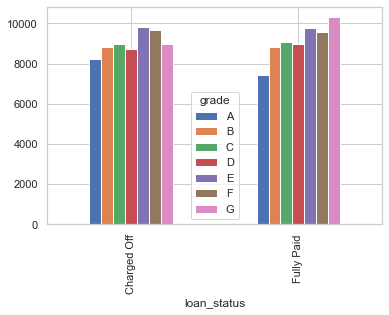

In [139]:
table.plot.bar()

<B>Observation-:</B>if we observe the revolving balance for risk section A,B,E,F under charged off population is higher than their fully paid counter parts , which indicates a more higher part of the population under charged off population are induced to higher risk due to revolving balance.

In [140]:
table=pd.pivot_table(loan_data,index='loan_status',columns='term',values='revol_util',aggfunc=np.mean)
table

term,36 months,60 months
loan_status,,
Charged Off,53.596963,55.429558
Fully Paid,45.922331,49.232075


<AxesSubplot:xlabel='loan_status'>

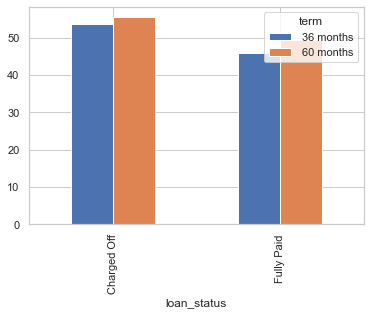

In [141]:
table.plot.bar()

<B>Observation-:</B>if we see here the charged off population clearly shows a higher revolving balance utilization rather than the fully paid population under both 36 and 60 months term which can be a higher contributer of default risk.

In [142]:
table=pd.pivot_table(loan_data,index='loan_status',columns='grade',values='revol_util',aggfunc=np.mean)
table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,35.588383,46.558336,55.239891,61.684111,69.481530,70.452874,68.700000
Fully Paid,28.596882,46.341523,56.554947,63.472140,67.558025,69.862973,79.609333


<AxesSubplot:xlabel='loan_status'>

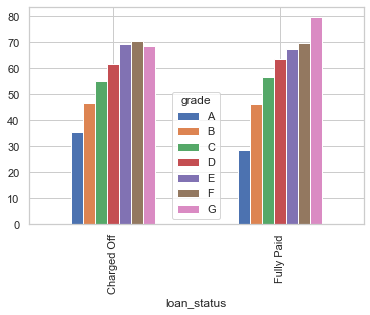

In [143]:
table.plot.bar()

<B>Observation-:</B>we can see in A,B,E,F risk categories revolving utilization have induced more charged offs which is a larger part of population , hence it is a clear risk contributing factor too.


<h1><center>Give the summery and recommendation</center></h1>

<h3>From analysis of important factors in bivariate and multivariate analysis targeted to find the positive induction of the charged off population we found the following pointers -: </h3>

-  More higher loan amount is a causation of charged off in case of higher term and Risk grade.
-  Defaulters are having less annual income than the fully paid Borrwers , which is  boosting default heavily.
-  DTI is a risk contributing factor in case of most population.
-  Revolving balance is positively contributing to the charged off population.
-  Revolving balance utilization is significantly contributing to the charged off population.
-  Grade of risk given by lending club is very much likely to be true in case of contribution to charged off as we have seen in  our analysis .
-  Term is also serving as an important indicator of risk for sure.



<h3><center>Recommendations</center></h3>

-  Amount of loan given should be less  for the people having higher risk grade
-  Amount of loan should be graeter only if the customer is in the lesser risk category A and opting for a 36 months term.
-  Deny to give loan to the customers who are earning less than 50000 if allowed put a higher interest rate .
-  DTI should not be greater than 13(after rounding) in case of 36 months term and should be less tahn and equal to 14(after  rounding)  in case of 60 months term .  
-  incase dti does not fall in range reject the loan application.
-  Do not allow people to utilize more % of revolving balance. Restrict the use of Revolving balance.